# Libraries and data import

In [74]:
# Import Libraries
import imp
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score
import pickle
import os
import shutil
from sklearn.metrics import mean_squared_error
from math import sqrt

In [31]:
# import dataframe

df = pd.read_csv("data/df_out1.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,logS_aq_avg,ALogP,ALogp2,AMR,naAromAtom,nAromBond,nAtom,ATSm1,ATSm2,ATSm3,ATSm4,ATSm5,ATSp1,ATSp2,ATSp3,ATSp4,ATSp5,nB,C1SP1,C2SP1,C1SP2,C2SP2,C3SP2,C1SP3,C2SP3,C3SP3,C4SP3,ECCEN,FMF,fragC,nHBAcc,nHBDon,HybRatio,Kier1,Kier2,Kier3,khs.sssB,khs.sCH3,khs.dCH2,khs.ssCH2,khs.tCH,khs.dsCH,khs.aaCH,khs.sssCH,khs.ddC,khs.tsC,khs.dssC,khs.aasC,khs.aaaC,khs.ssssC,khs.sNH2,khs.dNH,khs.ssNH,khs.aaNH,khs.tN,khs.dsN,khs.aaN,khs.sssN,khs.ddsN,khs.aasN,khs.sOH,khs.dO,khs.ssO,khs.aaO,khs.sF,khs.sssP,khs.dsssP,khs.sSH,khs.dS,khs.ssS,khs.aaS,khs.dssS,khs.ddssS,khs.sCl,khs.sBr,khs.sI,nAtomLC,nAtomP,nAtomLAC,MDEC.11,MDEC.12,MDEC.13,MDEC.14,MDEC.22,MDEC.23,MDEC.24,MDEC.33,MDEC.34,MDEC.44,MDEO.11,MDEO.12,MDEO.22,MDEN.11,MDEN.12,MDEN.13,MDEN.22,MDEN.23,MDEN.33,MLogP,PetitjeanNumber,topoShape,nRotB,LipinskiFailures,TopoPSA,VAdjMat,MW,WTPT.1,WTPT.2,WTPT.3,WTPT.4,WTPT.5,WPATH,WPOL,XLogP,Zagreb
0,-1.15,1.6128,2.601124,36.7388,0.0,0.0,21.0,10.548938,8.664184,10.438653,6.664184,5.664184,346.449760,335.495801,339.281645,237.122297,183.292346,8.0,0,0,1.0,2.0,0.0,2.0,1.0,1.0,0,76.0,0.000000,328.02,2.0,1.0,0.571429,9.000000,4.839506,8.000000,0,2.0,0,1.0,0,2.0,0.0,1.0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,7.0,2.0,6.0,0.500000,2.080084,1.788854,0.0,2.381102,3.301927,0.0,0.250000,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01,0.500000,1.000000,3.0,0,37.30,4.000000,128.169250,16.498300,1.833144,4.749993,4.749993,0.000000,108.0,6.0,2.057,34.0
1,-1.92,2.0167,4.067079,35.9129,0.0,0.0,23.0,10.548938,8.996276,9.770745,8.328368,6.996276,303.863246,286.834158,275.195845,232.239453,186.970253,8.0,0,0,1.0,0.0,0.0,3.0,3.0,0.0,0,83.0,0.000000,412.02,2.0,0.0,0.857143,9.000000,6.125000,5.877551,0,2.0,0,4.0,0,0.0,0.0,0.0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,8.0,3.0,4.0,0.142857,2.874433,0.577350,0.0,2.406852,2.149140,0.0,0.000000,0.0,0.0,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01,0.428571,0.750000,5.0,0,26.30,4.000000,130.185132,16.655024,1.850558,5.348035,5.348035,0.000000,108.0,7.0,1.844,32.0
2,-0.23,0.0671,0.004502,27.9149,0.0,0.0,15.0,12.097876,9.328368,12.877306,9.992552,7.992552,283.041292,286.586007,321.633016,239.861731,144.940931,8.0,0,0,3.0,0.0,1.0,0.0,1.0,0.0,0,63.0,0.000000,124.04,4.0,2.0,0.200000,9.000000,3.920000,4.500000,0,0.0,1,1.0,0,0.0,0.0,0.0,0,0,3.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,6.0,5.0,4.0,0.000000,0.500000,1.650964,0.0,0.000000,2.381102,0.0,1.650964,0.0,0.0,1.628651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.57,0.400000,0.666667,3.0,0,74.60,4.000000,130.098944,16.327527,1.814170,9.458406,9.458406,0.000000,96.0,8.0,-0.406,36.0
3,-4.23,2.9480,8.690704,45.0132,0.0,0.0,10.0,47.564750,17.758853,31.375344,50.610653,34.994162,690.236165,712.716278,807.763889,674.001616,345.217577,8.0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,0,61.0,0.000000,9.05,0.0,0.0,0.000000,9.000000,3.920000,2.880000,0,0.0,0,0.0,0,1.0,0.0,0.0,0,0,3.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,5.0,0,0,6.0,4.0,4.0,0.000000,0.000000,0.000000,0.0,0.000000,1.650964,0.0,2.381102,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.35,0.400000,0.666667,1.0,0,0.00,4.000000,226.315572,16.322301,1.813589,11.954832,0.000000,0.000000,92.0,10.0,4.068,36.0
4,0.61,0.0613,0.003758,31.1513,0.0,0.0,13.0,9.134449,8.664456,9.664456,7.996548,3.885554,304.024197,326.438638,382.403674,281.309842,116.699061,9.0,0,0,3.0,2.0,1.0,0.0,0.0,0.0,0,69.0,0.666667,97.03,2.0,0.0,0.000000,7.111111,3.239669,2.000000,0,0.0,0,0.0,0,0.0,4.0,0.0,0,0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0.0,1.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,3.0,8.0,0.0,0.000000,0.000000,0.000000,0.0,3.532776,3.941540,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.79,0.400000,0.666667,1.0,0,29.43,4.169925,106.102287,17.528614,1.947624,7.795248,2.407582,2.980083,88.0,9.0,-0.513,40.0


# Training Random Forest regressor on all features

In [80]:
labels = df['logS_aq_avg']
features = df.drop('logS_aq_avg', axis = 1)
feature_list = list(features.columns)
features = np.array(features)
labels = np.array(labels)

In [52]:
labels

array([-1.15, -1.92, -0.23, ..., -2.85, -6.2 , -7.88])

In [53]:
# Training and Testing Sets
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.25, random_state = 42)

In [54]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (5766, 114)
Training Labels Shape: (5766,)
Testing Features Shape: (1922, 114)
Testing Labels Shape: (1922,)


In [55]:
# Instantiate random forest and train on new features
from sklearn.ensemble import RandomForestRegressor
rf_exp = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf_exp.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [71]:
# Make predictions on train and test data
test_pred = rf_exp.predict(test_features)
train_pred = rf_exp.predict(train_features)

In [72]:
# R2 score on Train set
r2_score(train_labels, train_pred)

0.9760457441509691

In [73]:
# R2 score on Test set
r2_score(test_labels, test_pred)

0.8046858918272091

In [76]:
# Train RMSE
sqrt(mean_squared_error(train_labels, train_pred))

0.3296401112528017

In [75]:
# Test RMSE
sqrt(mean_squared_error(test_labels, test_pred))

0.9243590217547076

# Feature importance

In [81]:
# Get numerical feature importances
importances = list(rf_exp.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: XLogP                Importance: 0.49
Variable: ATSm1                Importance: 0.06
Variable: AMR                  Importance: 0.05
Variable: ATSp1                Importance: 0.04
Variable: ATSp2                Importance: 0.03
Variable: ALogP                Importance: 0.02
Variable: HybRatio             Importance: 0.02
Variable: khs.aasC             Importance: 0.02
Variable: nAtomP               Importance: 0.02
Variable: ALogp2               Importance: 0.01
Variable: ATSm3                Importance: 0.01
Variable: ATSm4                Importance: 0.01
Variable: ATSp3                Importance: 0.01
Variable: C2SP2                Importance: 0.01
Variable: FMF                  Importance: 0.01
Variable: fragC                Importance: 0.01
Variable: nHBDon               Importance: 0.01
Variable: MDEC.22              Importance: 0.01
Variable: MDEC.23              Importance: 0.01
Variable: MDEC.33              Importance: 0.01
Variable: MDEO.11              Importanc

In [156]:
feature_list =[ ]
for i in range(30):
    feature_list.append(feature_importances[i][0])

importances = []
for i in range(30):
    importances.append(feature_importances[i][1])


### Plot important features

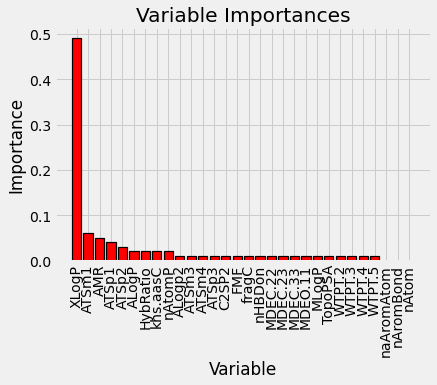

In [157]:
# Reset style 
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Consider only those feature which contributes  arround 90% to model performance

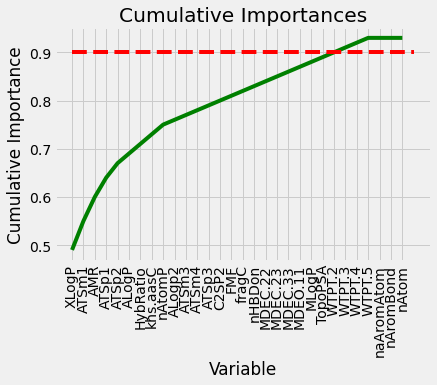

In [158]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances[0:30]]
sorted_features = [importance[0] for importance in feature_importances[0:30]]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 92% of importance retained
plt.hlines(y = 0.92, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

### Limit Number of Features
We will now reduce the number of features in use by the model to only those required to account for 92% of the importance. The same number of features must be used in the training and testing sets.

In [159]:
# Find number of features for cumulative importance of 92%
# Add 1 because Python is zero-indexed
print('Number of features for 92% importance:', np.where(cumulative_importances > 0.92)[0][0] + 1)

Number of features for 92% importance: 26


In [147]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:26]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]

# Create training and testing sets with only the important features
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]

# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (5766, 26)
Important test features shape: (1922, 26)


In [ ]:
# Train the expanded model on only the important features
rf_exp.fit(important_train_features, train_labels);

### Model evalution which is trained on important features

In [155]:
# Make predictions on train and test data
test_pred = rf_exp.predict(important_test_features)
train_pred = rf_exp.predict(important_train_features)
print("Model performace after feature selection:")
# R2 score on Train set
print("Train R2:", r2_score(train_labels, train_pred))

# R2 score on Test set
print("Test R2:", r2_score(test_labels, test_pred))

# Train RMSE
print("Test RMSE:", sqrt(mean_squared_error(train_labels, train_pred)))

# Test RMSE
print("Test RMSE:", sqrt(mean_squared_error(test_labels, test_pred)))

Model performace after feature selection:
Train R2: 0.9708085708410161
Test R2: 0.7727932980388049
Test RMSE: 0.3638952519491518
Test RMSE: 0.996975407568818
